In [1]:
import sys
import os

# Add the correct relative path to the scripts folder
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

In [2]:
test_path = r'C:\Users\lenovo\Desktop\10 aca\week4\Pharmaceuticals-sales-prediction\data\test.csv'  # Replace with actual path
train_path= r'C:\Users\lenovo\Desktop\10 aca\week4\Pharmaceuticals-sales-prediction\data\train.csv'
store_path= r'C:\Users\lenovo\Desktop\10 aca\week4\Pharmaceuticals-sales-prediction\data\store.csv'

In [3]:
from function import load_data,inspect_data,check_promo_distribution,check_holiday_sales,check_seasonal_behavior,check_correlation_sales_customers,check_promo_impact,check_promo_deployment,check_store_open_sales,check_assortment_impact,check_competition_distance,check_competitor_reopening,merge_data

In [4]:
#Load data
train, test ,store  = load_data(train_path, test_path,store_path)

c:\Users\lenovo\Desktop\10 aca\week4\Pharmaceuticals-sales-prediction\scripts\function.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)


In [5]:
inspect_data(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [11]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [12]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

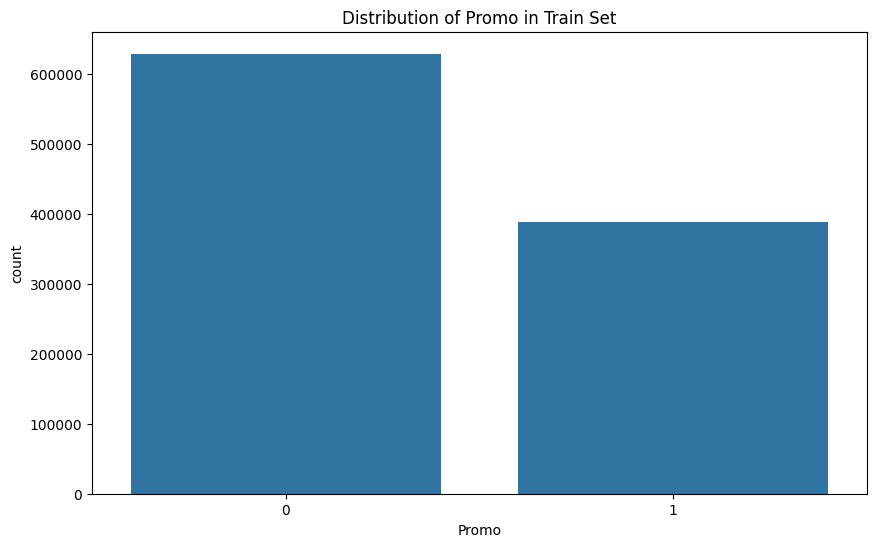

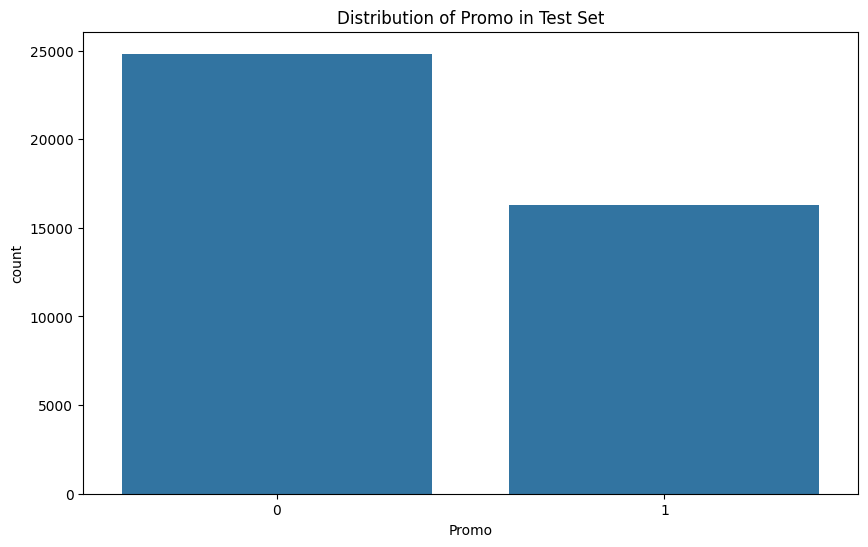

Promo distribution in Train Set:
 Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Promo distribution in Test Set:
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


In [10]:

check_promo_distribution(train, test)

Check & compare sales behavior before, during, and after holidays

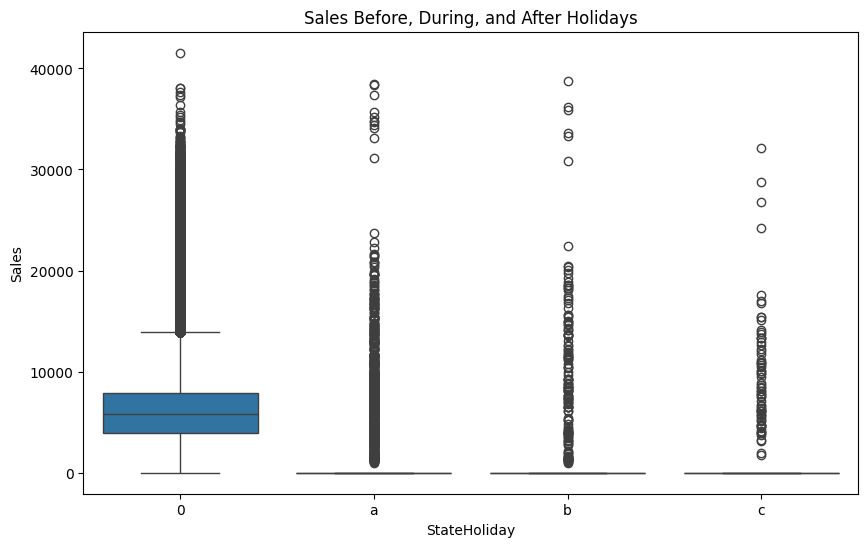

Average Sales based on Holidays:
 StateHoliday
0    5947.483893
a     290.735686
b     214.311510
c     168.733171
Name: Sales, dtype: float64


In [13]:
 #Sales behavior during holidays
check_holiday_sales(train)

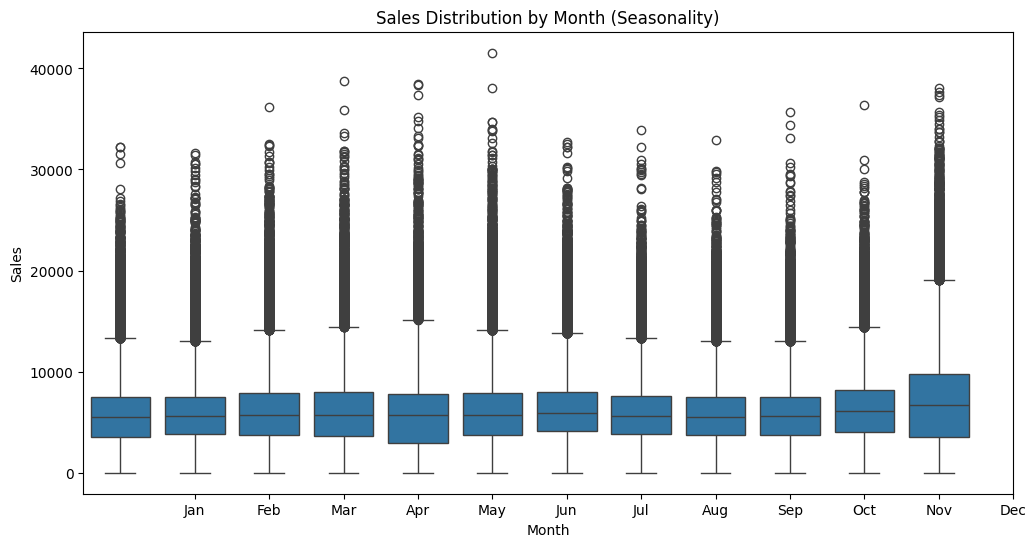

Average sales in December (Christmas): 6826.611376868607
Average sales during Easter (March/April): 5762.097581415864


In [14]:
#Seasonal behavior
check_seasonal_behavior(train)

Correlation between Sales and Customers:
               Sales  Customers
Sales      1.000000   0.894711
Customers  0.894711   1.000000


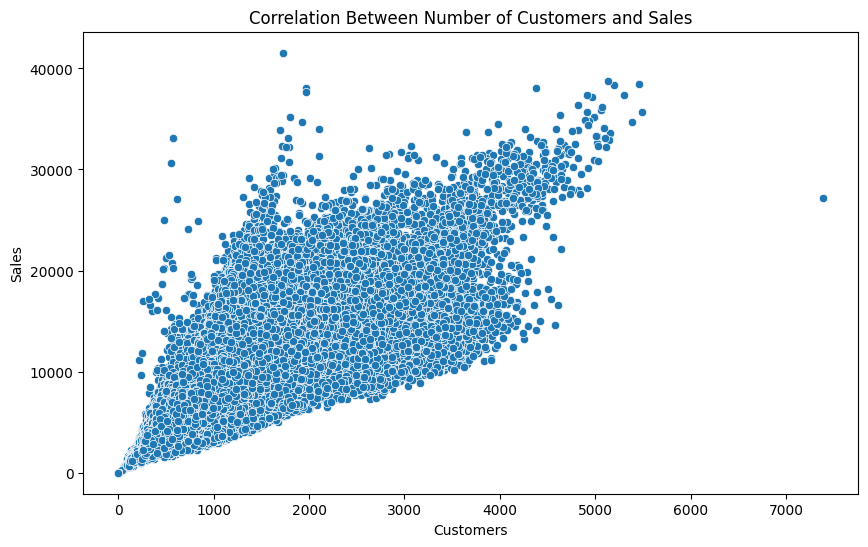

In [15]:
check_correlation_sales_customers(train)

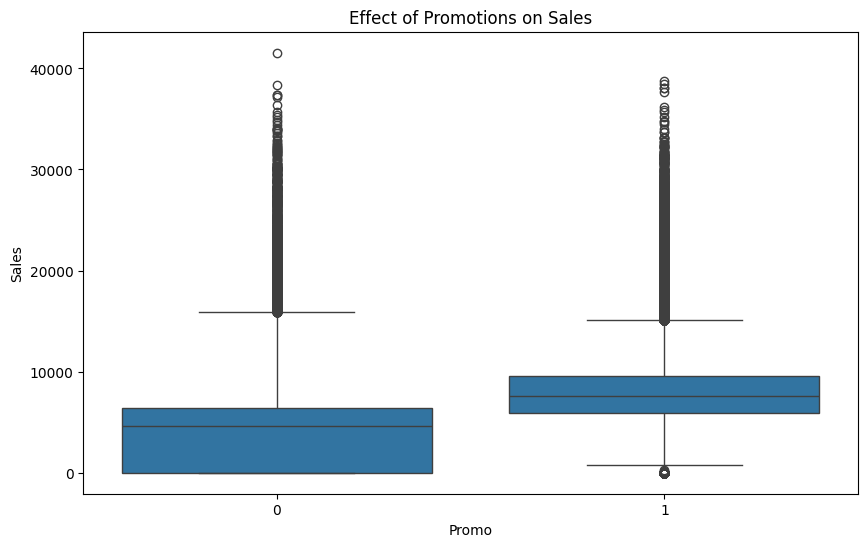

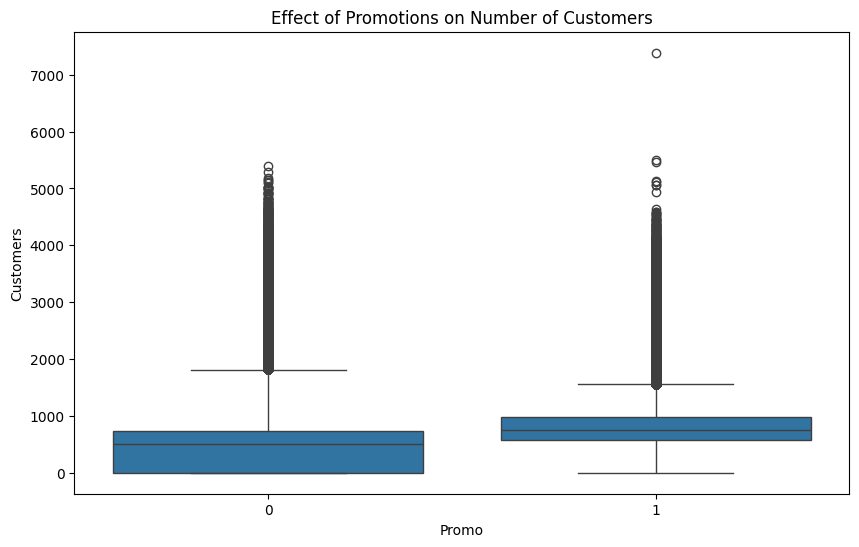

In [16]:
check_promo_impact(train)

In [17]:
# Promo deployment strategy
check_promo_deployment(train)

Stores where promos have the highest impact:
 Promo             0             1  Promo Impact
Store                                          
817    14043.338488  24679.566667  10636.228179
261     6694.369416  16478.113889   9783.744473
544     8329.314433  17072.355556   8743.041123
1014    6853.450172  15334.427778   8480.977606
963     5758.707904  13982.883333   8224.175430
788    11869.646048  19927.797222   8058.151174
335    10306.773196  18175.525000   7868.751804
251    12810.092784  20670.544444   7860.451661
513    12155.924399  19937.938889   7782.014490
831     7541.963918  15264.750000   7722.786082


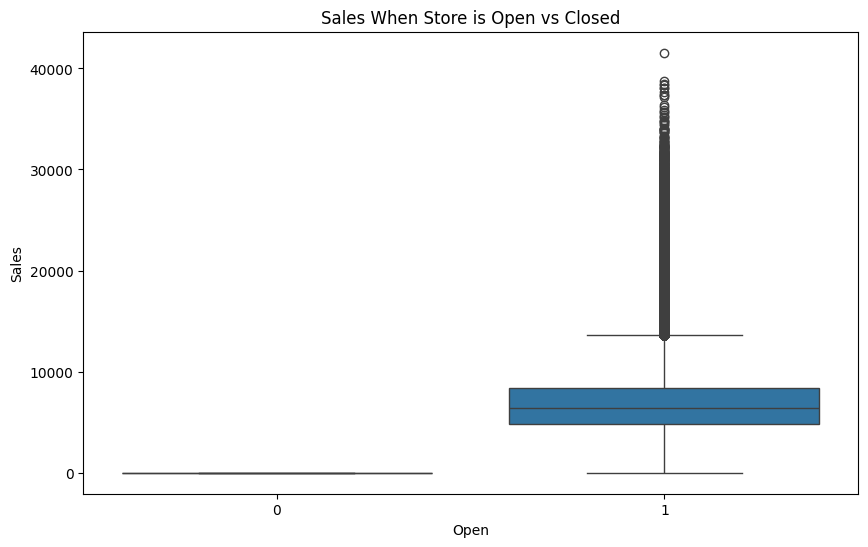

Stores open on all weekdays: [85, 262, 335, 423, 494, 562, 682, 733, 769, 1097]
Average weekend sales for stores always open: 11627.113059701493
Average weekend sales for other stores: 2953.2476234963947


In [18]:
#Store opening/closing trends
check_store_open_sales(train)

In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
new_merge = merge_data(train, store)

In [7]:
new_merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Assortment,CompetitionDistance
0,1,5,2015-07-31,5263,555,1,1,0,1,a,1270.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,570.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,14130.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,620.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,29910.0


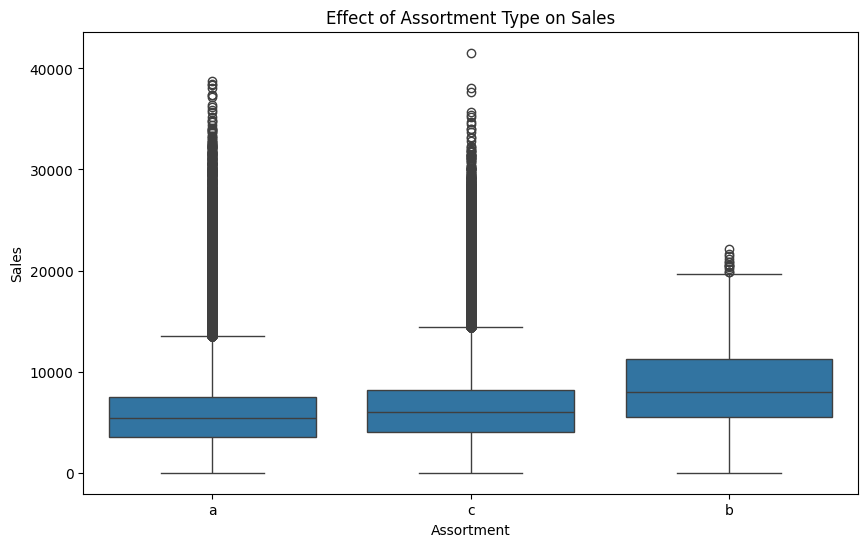

Average sales by assortment type:
 Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64


In [8]:
#Assortment type impact
check_assortment_impact(new_merge)

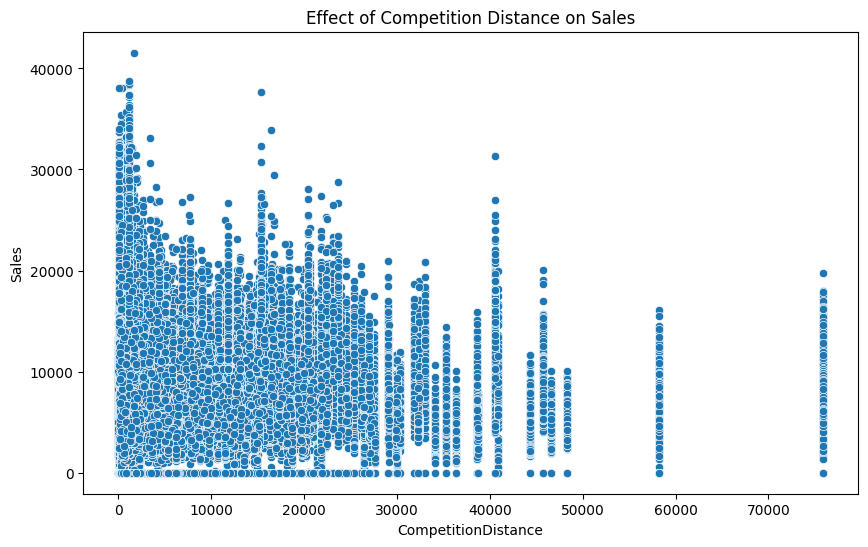

Average sales for stores without competition data (NA): 4535.892884178653
Average sales for stores with competition data: 5777.042614238389


In [10]:
 #Competition distance impact
check_competition_distance(new_merge)

In [11]:
 #Competitor reopening impact
check_competitor_reopening(new_merge)

Sales impact for stores with later competition reopening: Store
291    6643.281316
622    3593.717622
879    3087.831135
Name: Sales, dtype: float64
